In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
dataset=load_breast_cancer()
df=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df['target']=dataset['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
from sklearn.model_selection import train_test_split
data=df.loc[:, df.columns != 'target']
target=df['target']
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.20,random_state=1)

In [4]:
print('train data of x_train is: ',x_train.shape)
print('train data of x_test is: ',x_test.shape)
print('train data of y_train is: ',y_train.shape)
print('train data of y_train is: ',y_test.shape)

train data of x_train is:  (455, 30)
train data of x_test is:  (114, 30)
train data of y_train is:  (455,)
train data of y_train is:  (114,)


In [5]:
print(y_train.value_counts())
print(y_test.value_counts())

1    285
0    170
Name: target, dtype: int64
1    72
0    42
Name: target, dtype: int64


# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\divya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38,  4],
       [ 2, 70]], dtype=int64)

In [8]:
print(metrics.classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.950     0.905     0.927        42
           1      0.946     0.972     0.959        72

    accuracy                          0.947       114
   macro avg      0.948     0.938     0.943       114
weighted avg      0.947     0.947     0.947       114



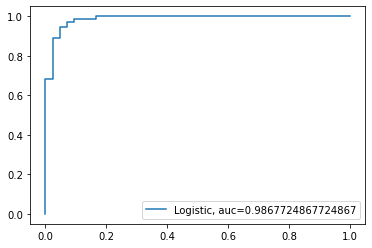

In [9]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [10]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
y_pred_proba

array([6.91535251e-01, 3.47921764e-01, 9.96036981e-01, 1.44003532e-03,
       2.63664156e-01, 1.53266779e-03, 3.91314878e-05, 2.10483164e-02,
       9.77942293e-01, 9.88518328e-01, 9.68673396e-01, 1.46006454e-01,
       1.56048945e-01, 9.81903504e-01, 7.98467540e-01, 8.84569650e-01,
       9.67752742e-01, 9.75161434e-01, 9.99040109e-01, 1.92092967e-06,
       9.89176667e-01, 9.53134514e-01, 2.13357127e-03, 9.77150219e-01,
       8.29428915e-02, 8.77735314e-01, 9.68993681e-01, 1.08604820e-06,
       3.18280556e-18, 5.71140616e-03, 6.82748976e-10, 9.95640890e-01,
       7.95152254e-05, 7.66883680e-02, 9.72659290e-01, 9.75179682e-01,
       1.12955684e-03, 9.17451676e-01, 3.42387535e-01, 9.93971948e-01,
       9.97603893e-01, 8.12071806e-01, 9.39018733e-01, 9.87646576e-01,
       9.79566754e-01, 1.40779900e-01, 9.90529396e-01, 9.97116887e-01,
       7.31924913e-01, 1.02633509e-02, 5.37865367e-05, 3.81737240e-13,
       9.96853522e-01, 9.95986860e-01, 9.88917948e-01, 9.63549709e-01,
      

In [11]:
fpr

array([0.        , 0.        , 0.        , 0.02380952, 0.02380952,
       0.04761905, 0.04761905, 0.07142857, 0.07142857, 0.0952381 ,
       0.0952381 , 0.16666667, 0.16666667, 1.        ])

In [12]:
tpr

array([0.        , 0.01388889, 0.68055556, 0.68055556, 0.88888889,
       0.88888889, 0.94444444, 0.94444444, 0.97222222, 0.97222222,
       0.98611111, 0.98611111, 1.        , 1.        ])

In [13]:
_


array([1.99927657e+00, 9.99276572e-01, 9.70103942e-01, 9.69635365e-01,
       8.77735314e-01, 8.71835973e-01, 7.98467540e-01, 7.80433028e-01,
       6.91535251e-01, 5.36984701e-01, 4.79090753e-01, 3.41772806e-01,
       3.08937921e-01, 3.18280556e-18])

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)
#train model
model_knn.fit(x_train,y_train)
predicteddata=model_knn.predict(x_test)

In [15]:
accuracy=metrics.accuracy_score(y_test,predicteddata)
print("Accuracy of model is : ",accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicteddata)
cm

Accuracy of model is :  0.9385964912280702


array([[37,  5],
       [ 2, 70]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,predicteddata)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



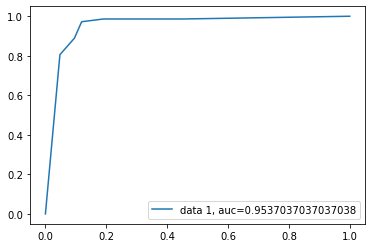

In [17]:
y_pred_proba_knn = model_knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend()
plt.show()

In [18]:
from sklearn.svm import SVC
model_svc=SVC(kernel='linear',probability=True) 
model_svc

SVC(kernel='linear', probability=True)

In [19]:
model_svc.fit(x_train,y_train)
predicteddata=model_svc.predict(x_test)

In [20]:
accuracy=metrics.accuracy_score(y_test,predicteddata)
print("Accuracy of model is : ",accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicteddata)
cm

Accuracy of model is :  0.956140350877193


array([[37,  5],
       [ 0, 72]], dtype=int64)

In [21]:
cr1=classification_report(y_test,predicteddata)
print(cr1)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



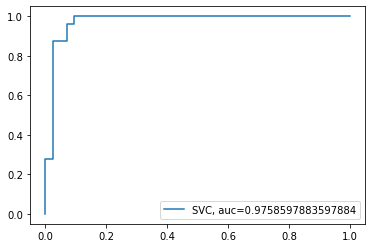

In [22]:
y_pred_proba_svc = model_svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_svc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))
plt.legend()
plt.show()

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [24]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of model is : ",accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy of model is :  0.956140350877193


array([[38,  4],
       [ 1, 71]], dtype=int64)

In [25]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



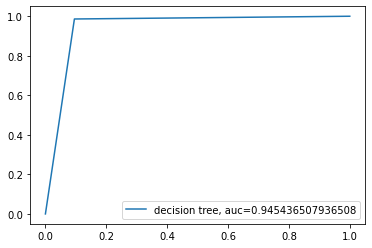

In [26]:
y_pred_proba_dt = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_dt)
auc = metrics.roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr,tpr,label="decision tree, auc="+str(auc))
plt.legend()
plt.show()

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [28]:
model_nb.fit(x_train,y_train)
y_pred= model_nb.predict(x_test)

In [29]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of model is : ",accuracy)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy of model is :  0.9473684210526315


array([[38,  4],
       [ 2, 70]], dtype=int64)

In [30]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



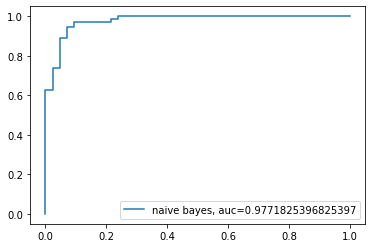

In [31]:
y_pred_proba_nb = model_nb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_nb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_nb)
plt.plot(fpr,tpr,label="naive bayes, auc="+str(auc))
plt.legend()
plt.show()

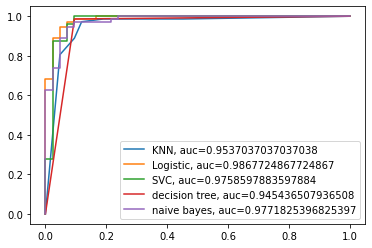

In [32]:
y_pred_proba_knn = model_knn.predict_proba(x_test)[::,1]
fpr_k, tpr_k, _k = metrics.roc_curve(y_test, y_pred_proba_knn)
auc = metrics.roc_auc_score(y_test, y_pred_proba_knn)
plt.plot(fpr_k,tpr_k,label="KNN, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic, auc="+str(auc))

y_pred_proba_svc = model_svc.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_svc)
auc = metrics.roc_auc_score(y_test, y_pred_proba_svc)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))

y_pred_proba_dt = clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_dt)
auc = metrics.roc_auc_score(y_test, y_pred_proba_dt)
plt.plot(fpr,tpr,label="decision tree, auc="+str(auc))

y_pred_proba_nb = model_nb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_nb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_nb)
plt.plot(fpr,tpr,label="naive bayes, auc="+str(auc))

plt.legend()
plt.show()

# Naive Bayes is the best Algorithm to use here according to ROC & auc
